In [11]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
from adjustText import adjust_text

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Scientist data
df_DA = df[df['job_title_short'] == 'Data Analyst']
df_DS = df[df['job_title_short'] == 'Data Scientist']

In [2]:
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()

df_DS['job_posted_month_no'] = df_DS['job_posted_date'].dt.month

df_DS_explode = df_DS.explode('job_skills')

df_DS_pivot = df_DS_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DS_pivot.loc['Total'] = df_DS_pivot.sum()

df_DS_pivot = df_DS_pivot[df_DS_pivot.loc['Total'].sort_values(ascending=False).index]

df_DS_pivot = df_DS_pivot.drop('Total')

df_DS_pivot = df_DS_pivot.reset_index()

df_DS_pivot['job_posted_month'] = df_DS_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x ,format='%m').strftime('%b'))

df_DS_pivot = df_DS_pivot.set_index('job_posted_month')

df_DS_pivot = df_DS_pivot.drop(columns='job_posted_month_no')

df_DS_pivot

job_skills,python,sql,r,sas,tableau,aws,spark,azure,tensorflow,excel,...,huggingface,fastify,esquisse,workfront,play framework,nuxt.js,mattermost,shogun,sqlserver,wimi
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,13998,9811,7566,3842,3446,3253,3222,2582,2316,2132,...,0,0,0,0,0,0,0,0,0,0
Feb,9551,6600,5064,2644,2566,2089,2085,1716,1525,1453,...,0,0,1,0,0,0,0,0,0,0
Mar,9210,6374,4971,2480,2456,2092,1992,1727,1405,1440,...,0,0,0,1,0,0,0,1,0,0
Apr,9135,6270,4873,2444,2447,2055,1905,1665,1546,1456,...,0,2,0,0,0,0,0,0,0,0
May,8029,5583,4228,2244,2271,1921,1716,1442,1271,1202,...,0,0,0,0,0,0,0,0,0,0
Jun,9338,6473,5019,2282,2432,2173,2072,1739,1580,1324,...,0,1,1,0,0,0,0,0,0,0
Jul,9400,6678,5029,2300,2547,2207,1972,1845,1535,1425,...,1,0,0,0,0,0,0,0,0,0
Aug,11193,8026,6089,3100,3013,2571,2466,2130,1972,1795,...,0,0,0,0,1,0,0,0,0,0
Sep,8393,5748,4153,2224,2062,1923,1820,1704,1462,1352,...,3,0,0,0,0,0,0,0,0,0


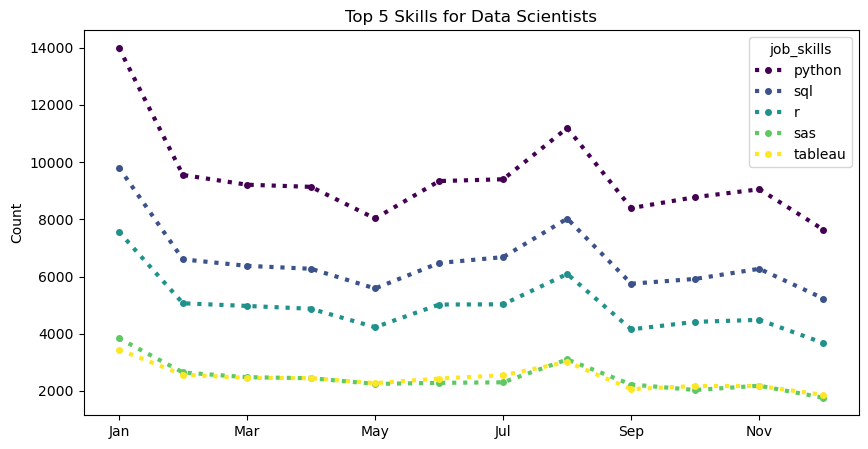

In [3]:
df_DS_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=3,
    linestyle=':',
    colormap='viridis',
    marker='o',
    markersize=4,
    figsize=(10, 5)
)
plt.title('Top 5 Skills for Data Scientists')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [6]:
df_DA_exploded = df_DA.explode('job_skills')

skill_stats = df_DA_exploded.groupby('job_skills').agg(
    median_salary =('salary_year_avg', 'median'),
    skill_count = ('job_skills', 'count')
)

skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

skill_stats

,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


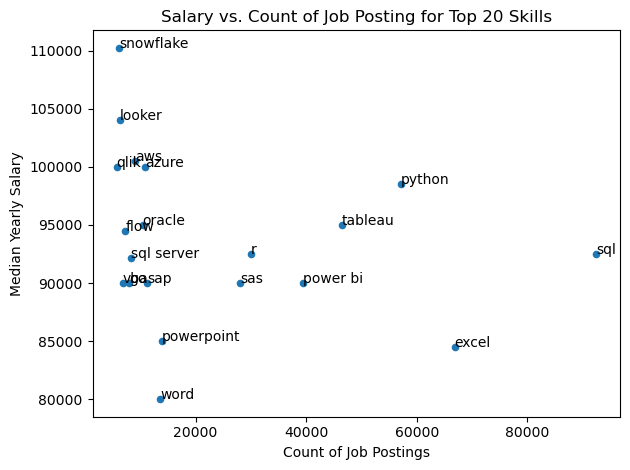

In [10]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
    
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Posting for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

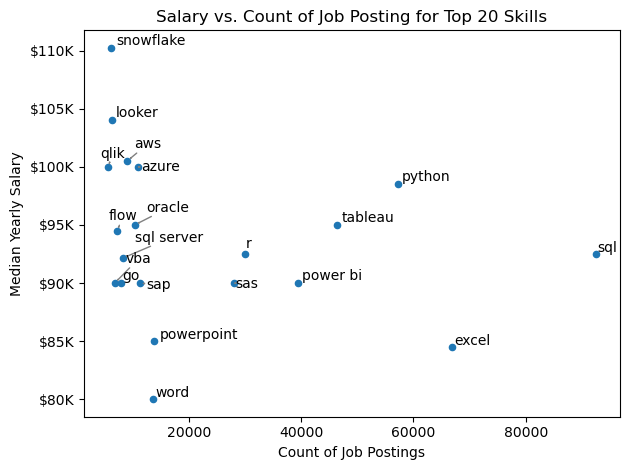

In [15]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))
    
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Posting for Top {skill_count} Skills')
plt.tight_layout()
plt.show()